In [7]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
base_path="./"

In [8]:
def fasttextPreTrained(vecfile):
    """
    Creates a dictionary in which every character, bigram or trigram is associated with a numeric vector
    :param vecfile: str
        String representing path in which FastText vecfile is located
    :return: embeddings_index: dict
        Dictionary containing the vectorization of characters,bigrams or trigrams
        key: character,bigram or trigram
        value: numeric vector associated to key
    """
    ######################################
    # EMBEDDING LAYER
    #####################################
    embeddings_index = {}
    f = open(vecfile, "r")
    next(f)
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:])
        embeddings_index[word] = coefs
    f.close()
    print('Found %s word vectors.' % len(embeddings_index))
    return embeddings_index


['cryptolocker', 'dircrypt', 'dyre', 'legit', 'padcrypt', 'zeus-newgoz']


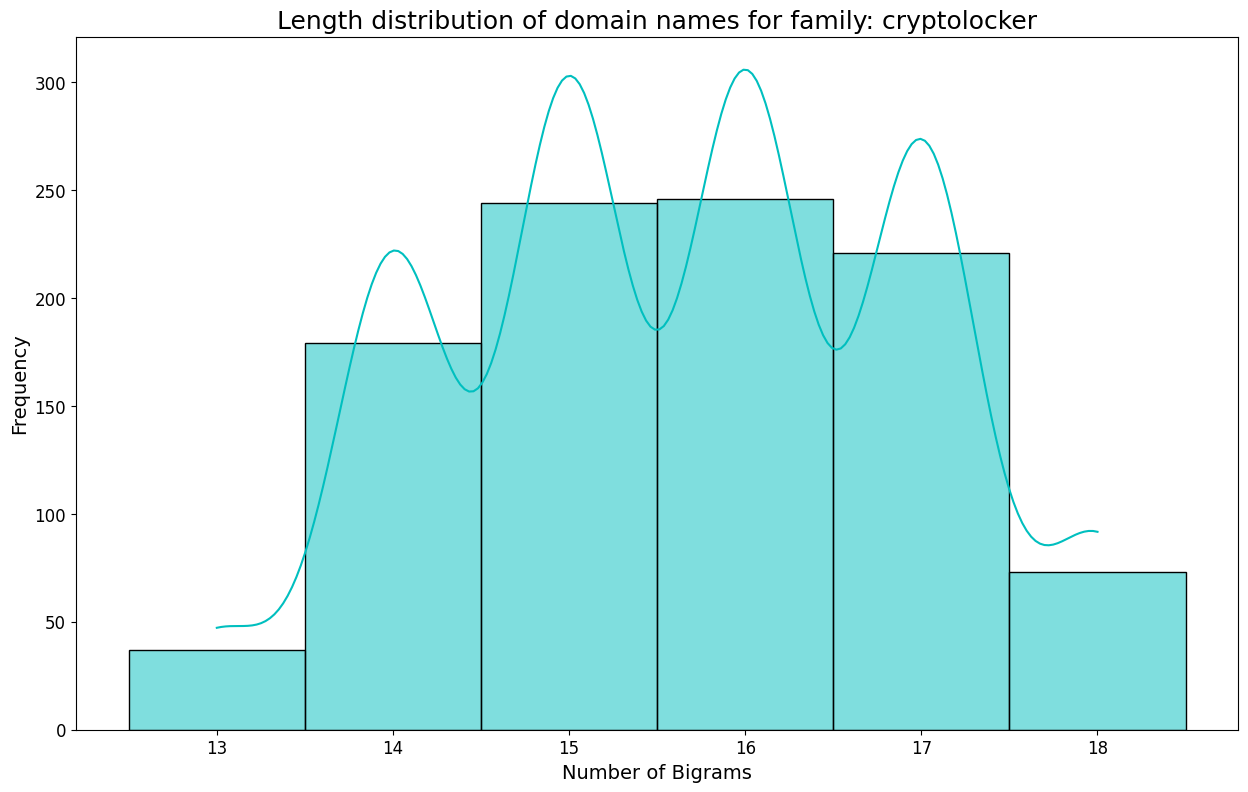

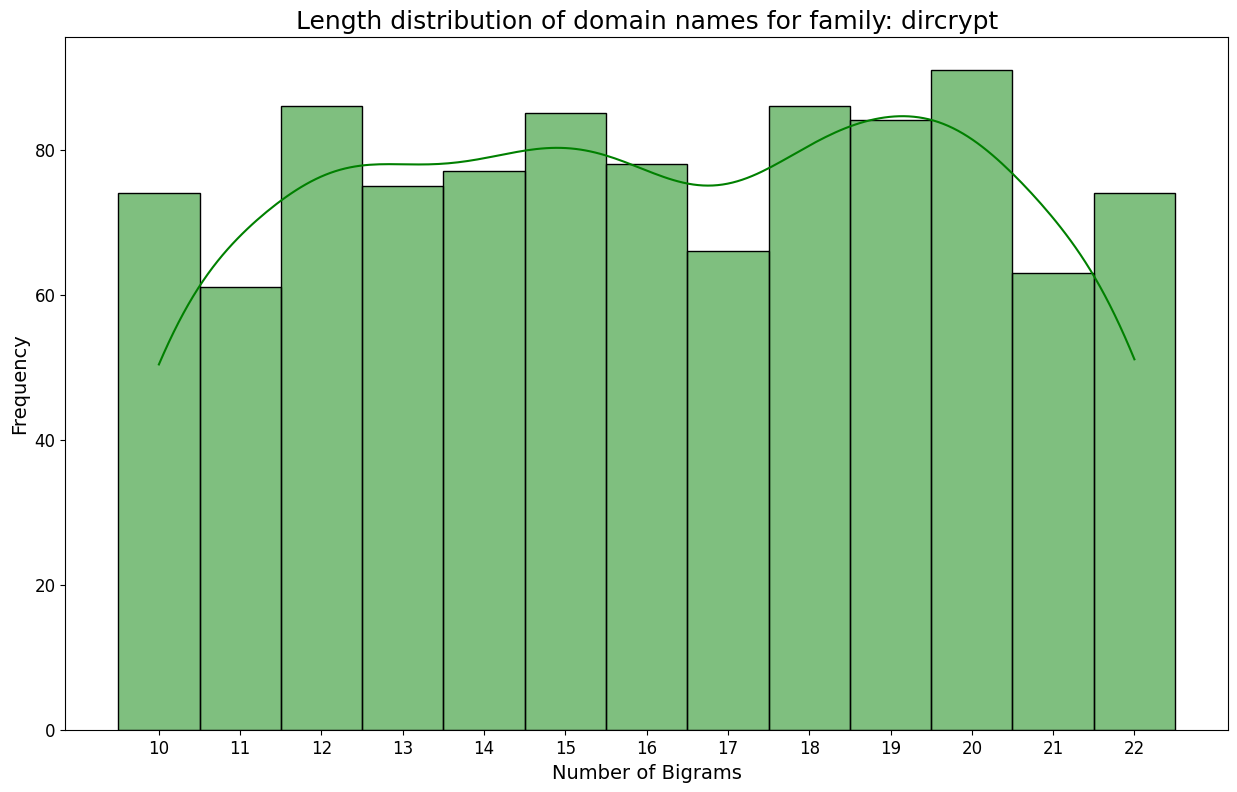

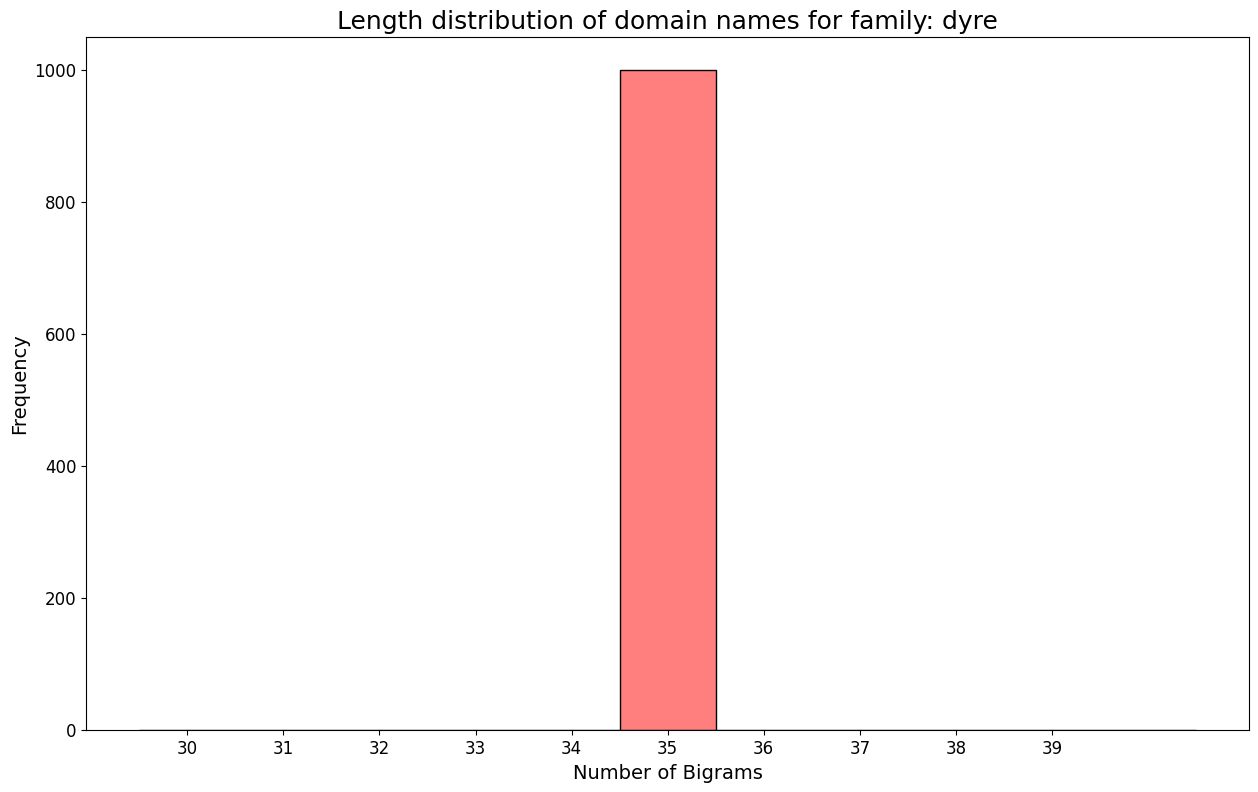

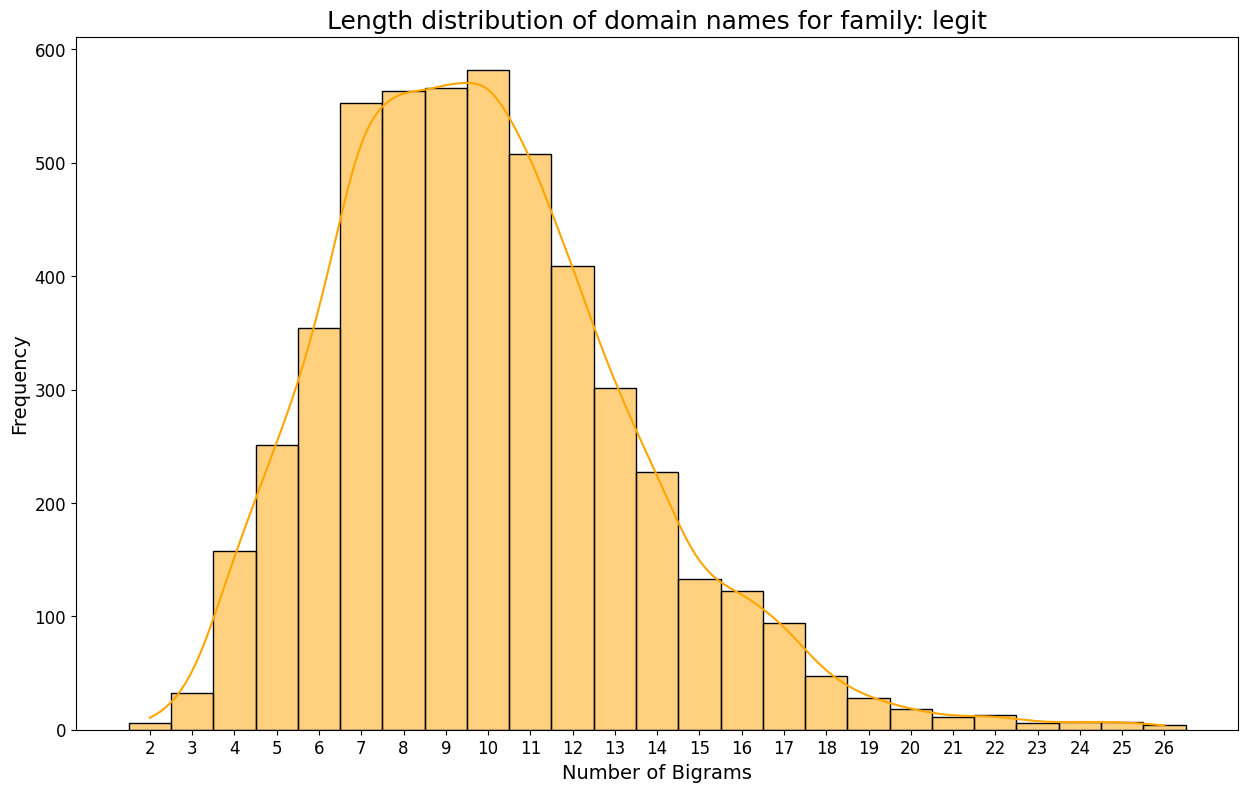

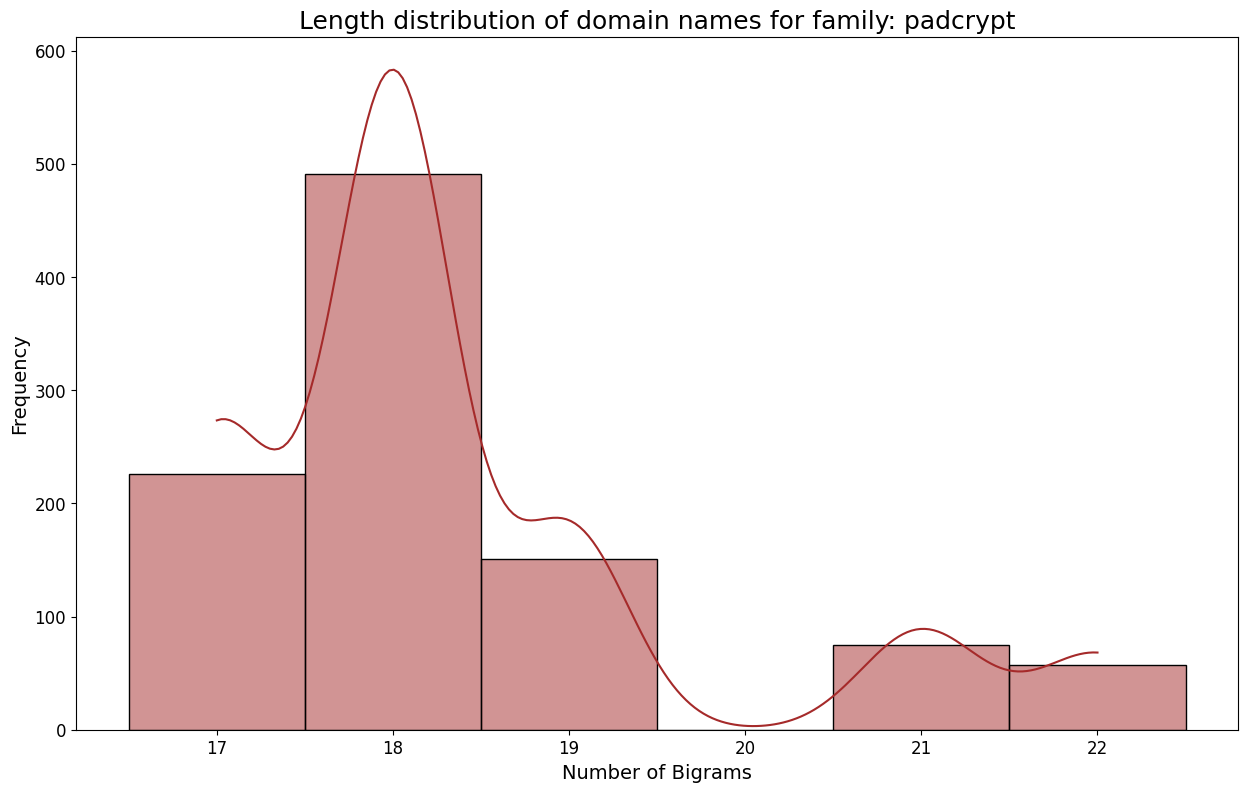

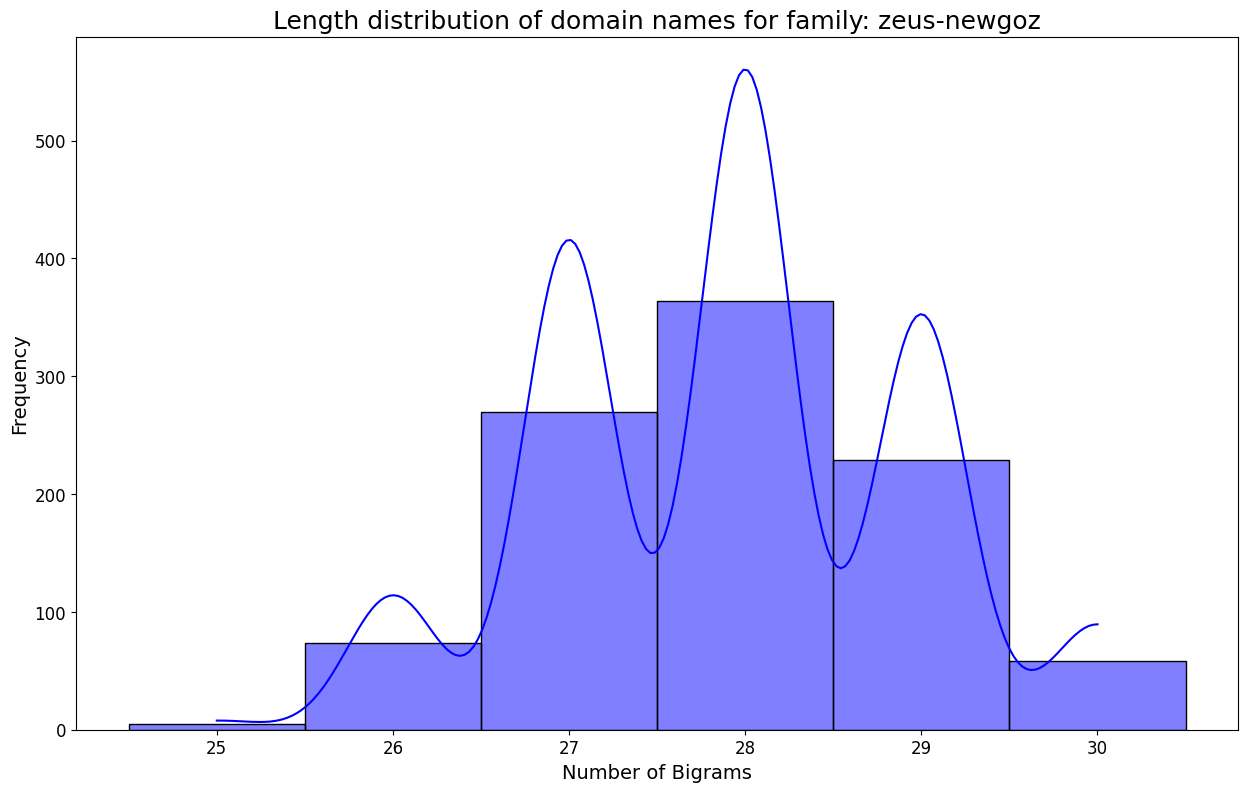

<Figure size 640x480 with 0 Axes>

In [15]:
def run_length():
    dataset = pd.read_csv(f'example_dataset.csv')
    families = list(set(dataset["label_multiclass"]))
    families.sort()
    print(families)
    colors=["c", "g", "r", "orange", "brown","b"]
    for family, color in zip(families, colors):
        dataset_to_study = dataset[dataset["label_multiclass"] == family]
        domain_names_to_study = dataset_to_study["bigrams"]
        lengths = [len(name.split()) for name in domain_names_to_study]
        '''
        length_dict = dict(Counter(length for length in lengths))
        print(length_dict)
        plt.hist(lengths, color=color)
        plt.title(family)
        plt.xlabel("number of bigrams")
        plt.ylabel("frequency")
        plt.show()
        '''
        if family == "dyre":
            sns.histplot(lengths, kde=True, discrete=True, color=color, binrange=(30,40))
            figure=plt.gcf()
            plt.xticks(np.arange(30, 40, step=1)) 
        else:
            sns.histplot(lengths, kde=True, discrete=True, color=color)
            figure=plt.gcf()
            plt.xticks(np.arange(np.min(lengths), np.max(lengths)+1, step=1)) 
        figure.set_size_inches(15, 9)
        plt.title(f"Length distribution of domain names for family: {family}", fontsize=18)
        plt.xticks(rotation=0, fontsize=12)
        plt.yticks(fontsize=12)
        plt.xlabel("Number of Bigrams", fontsize=14)
        plt.ylabel("Frequency", fontsize=14)
        figure.savefig(f"{family}")
        plt.show()
        plt.clf()
        
        

run_length()

Found 1330 word vectors.


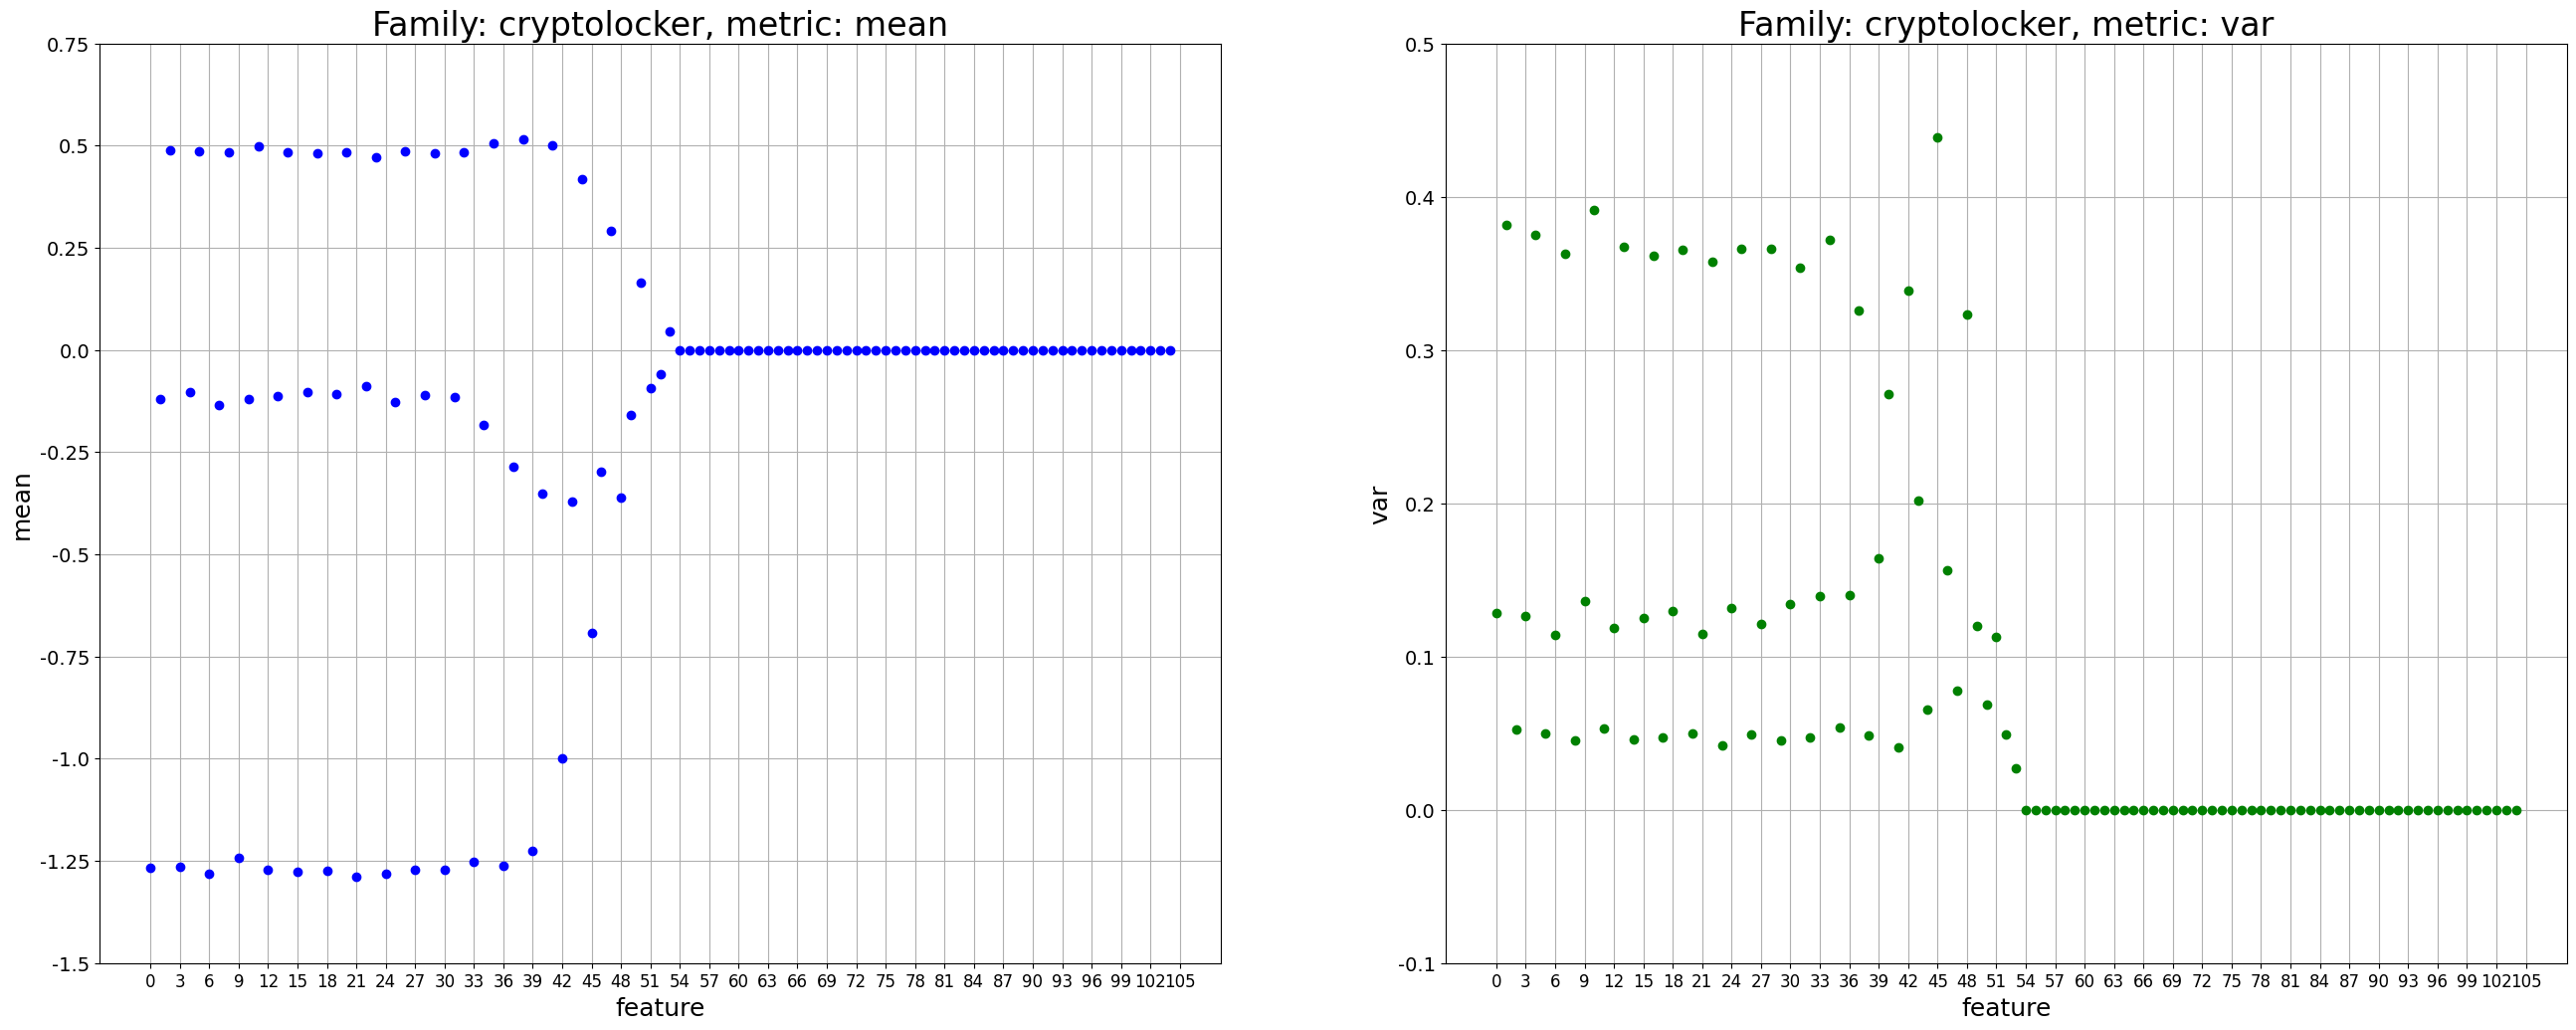

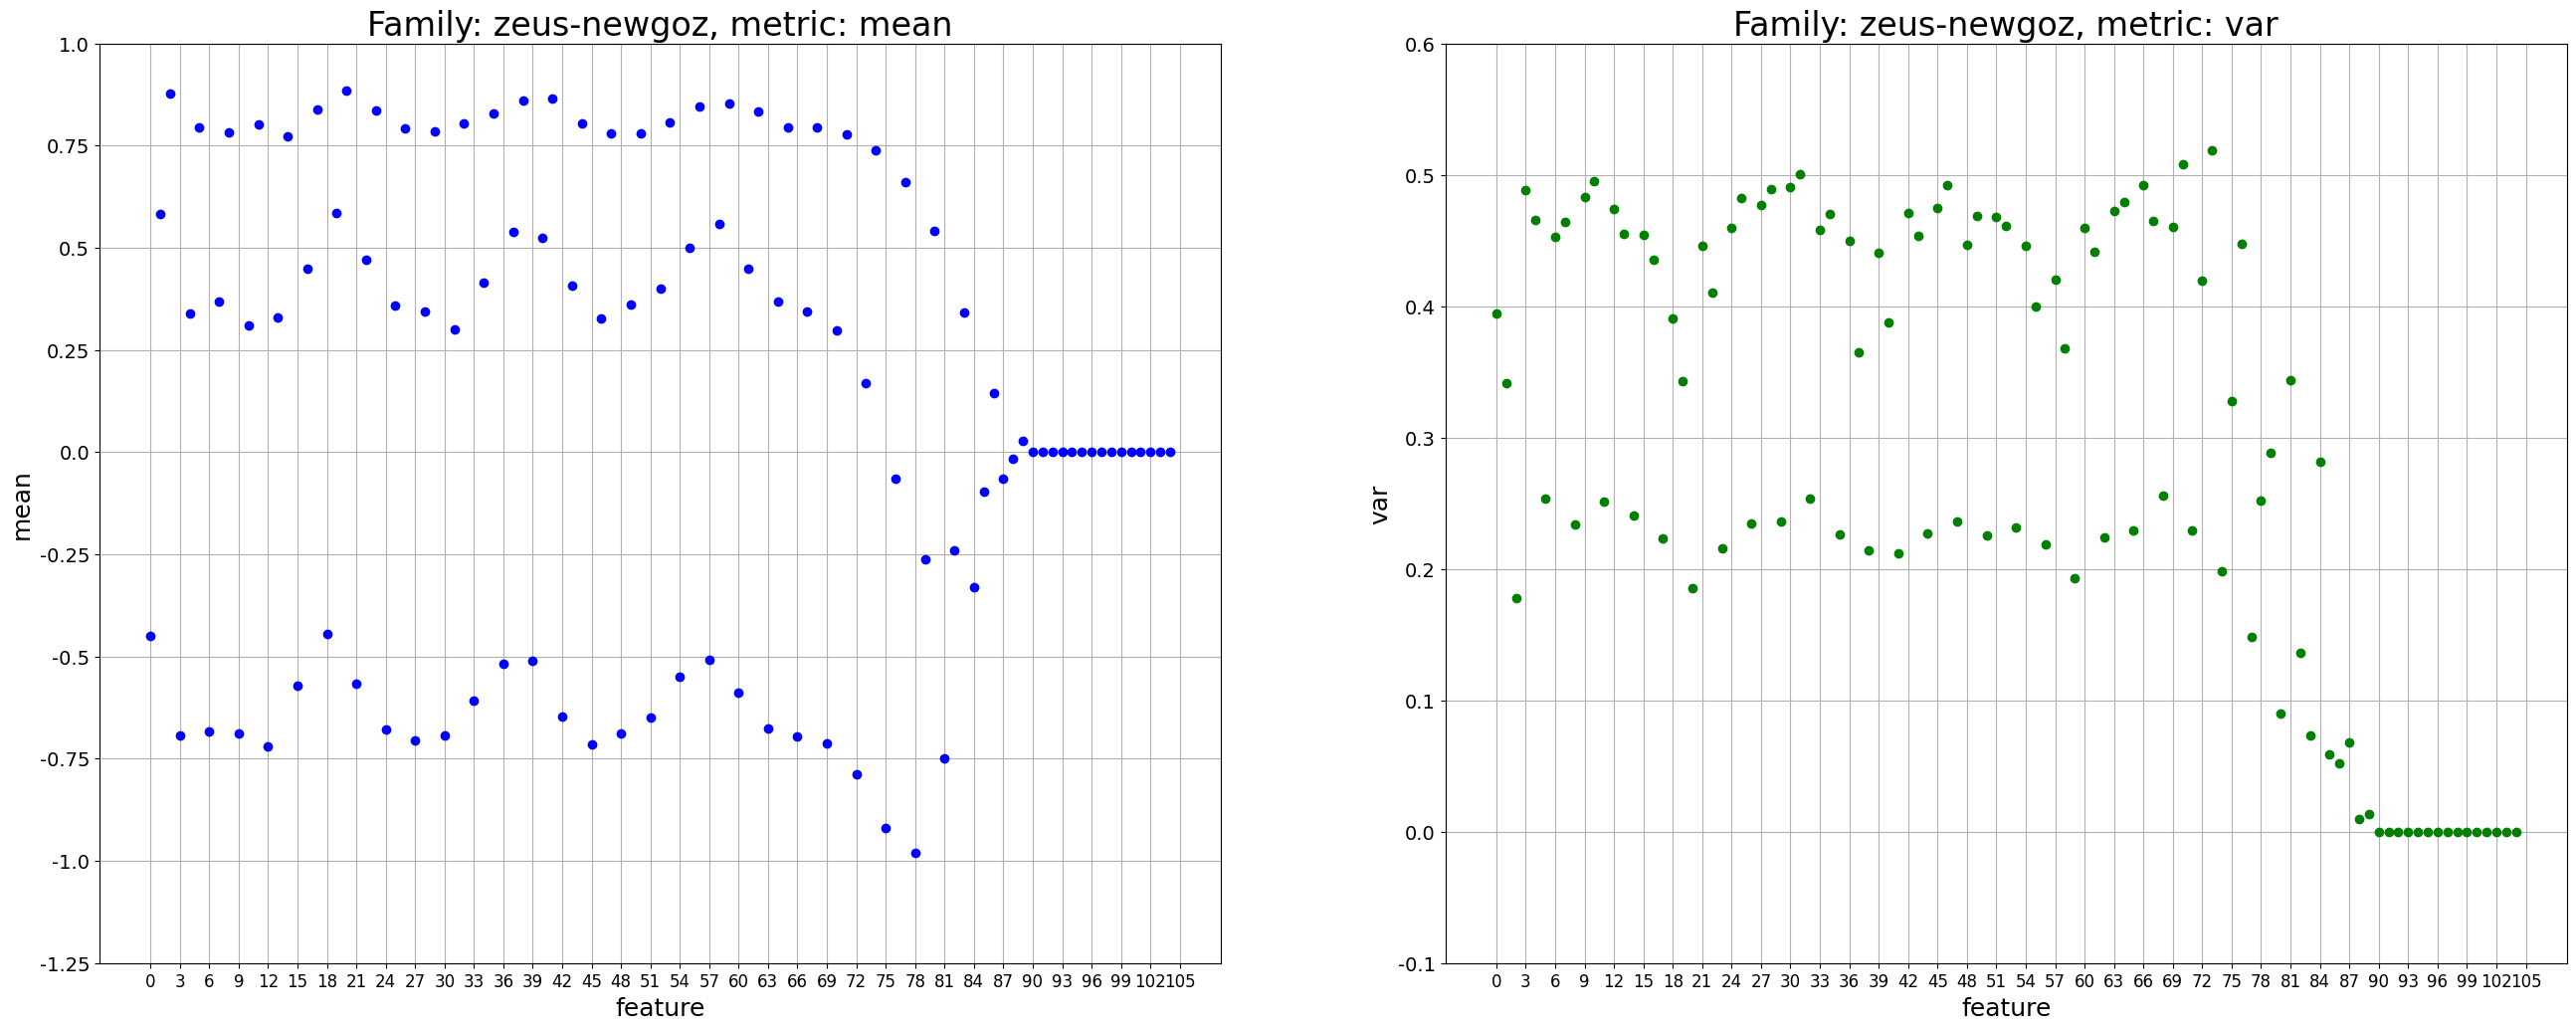

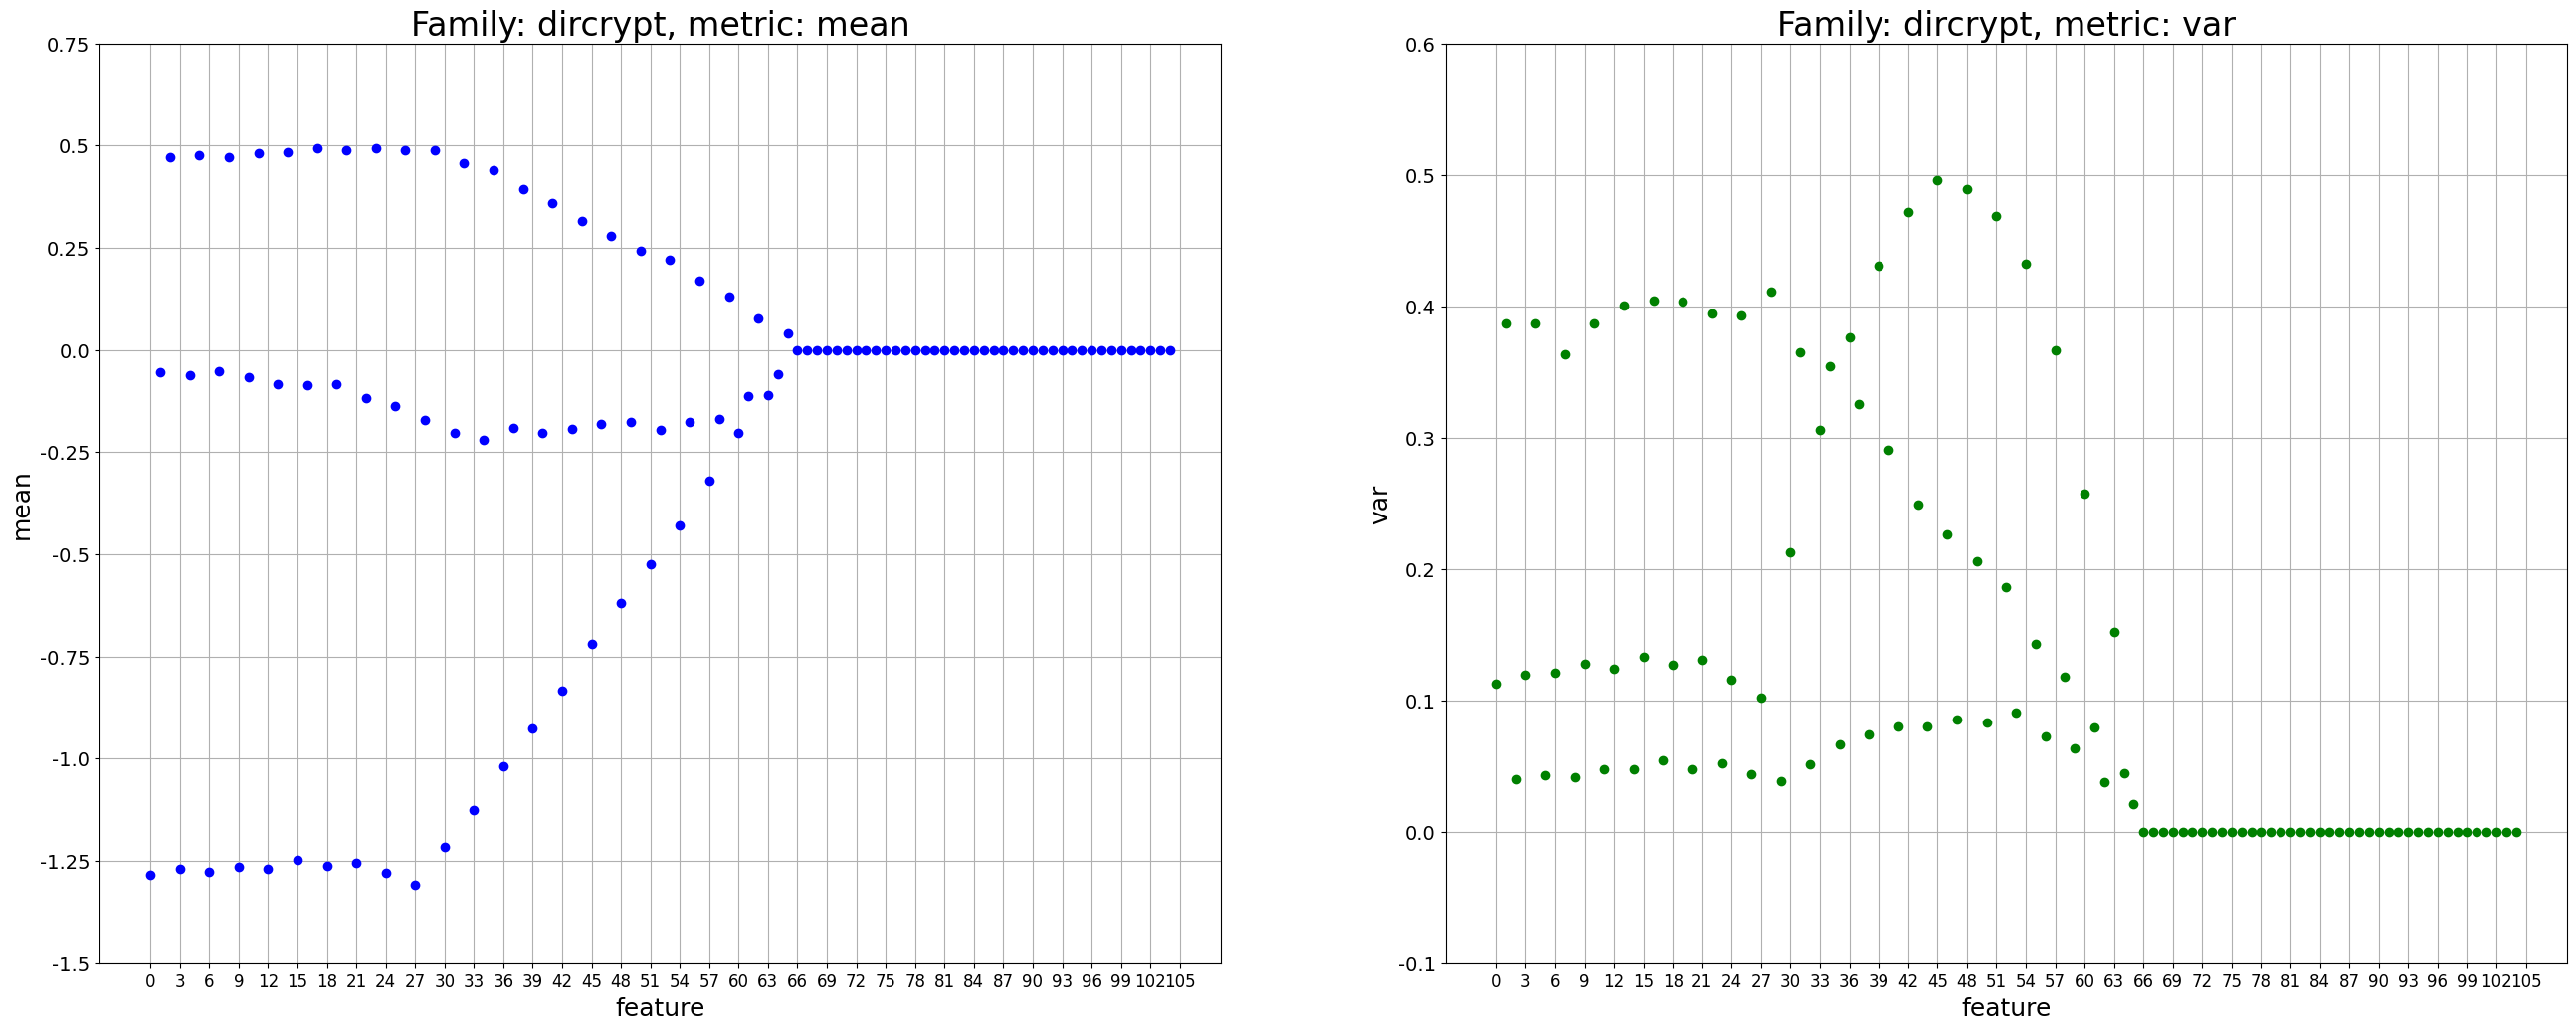

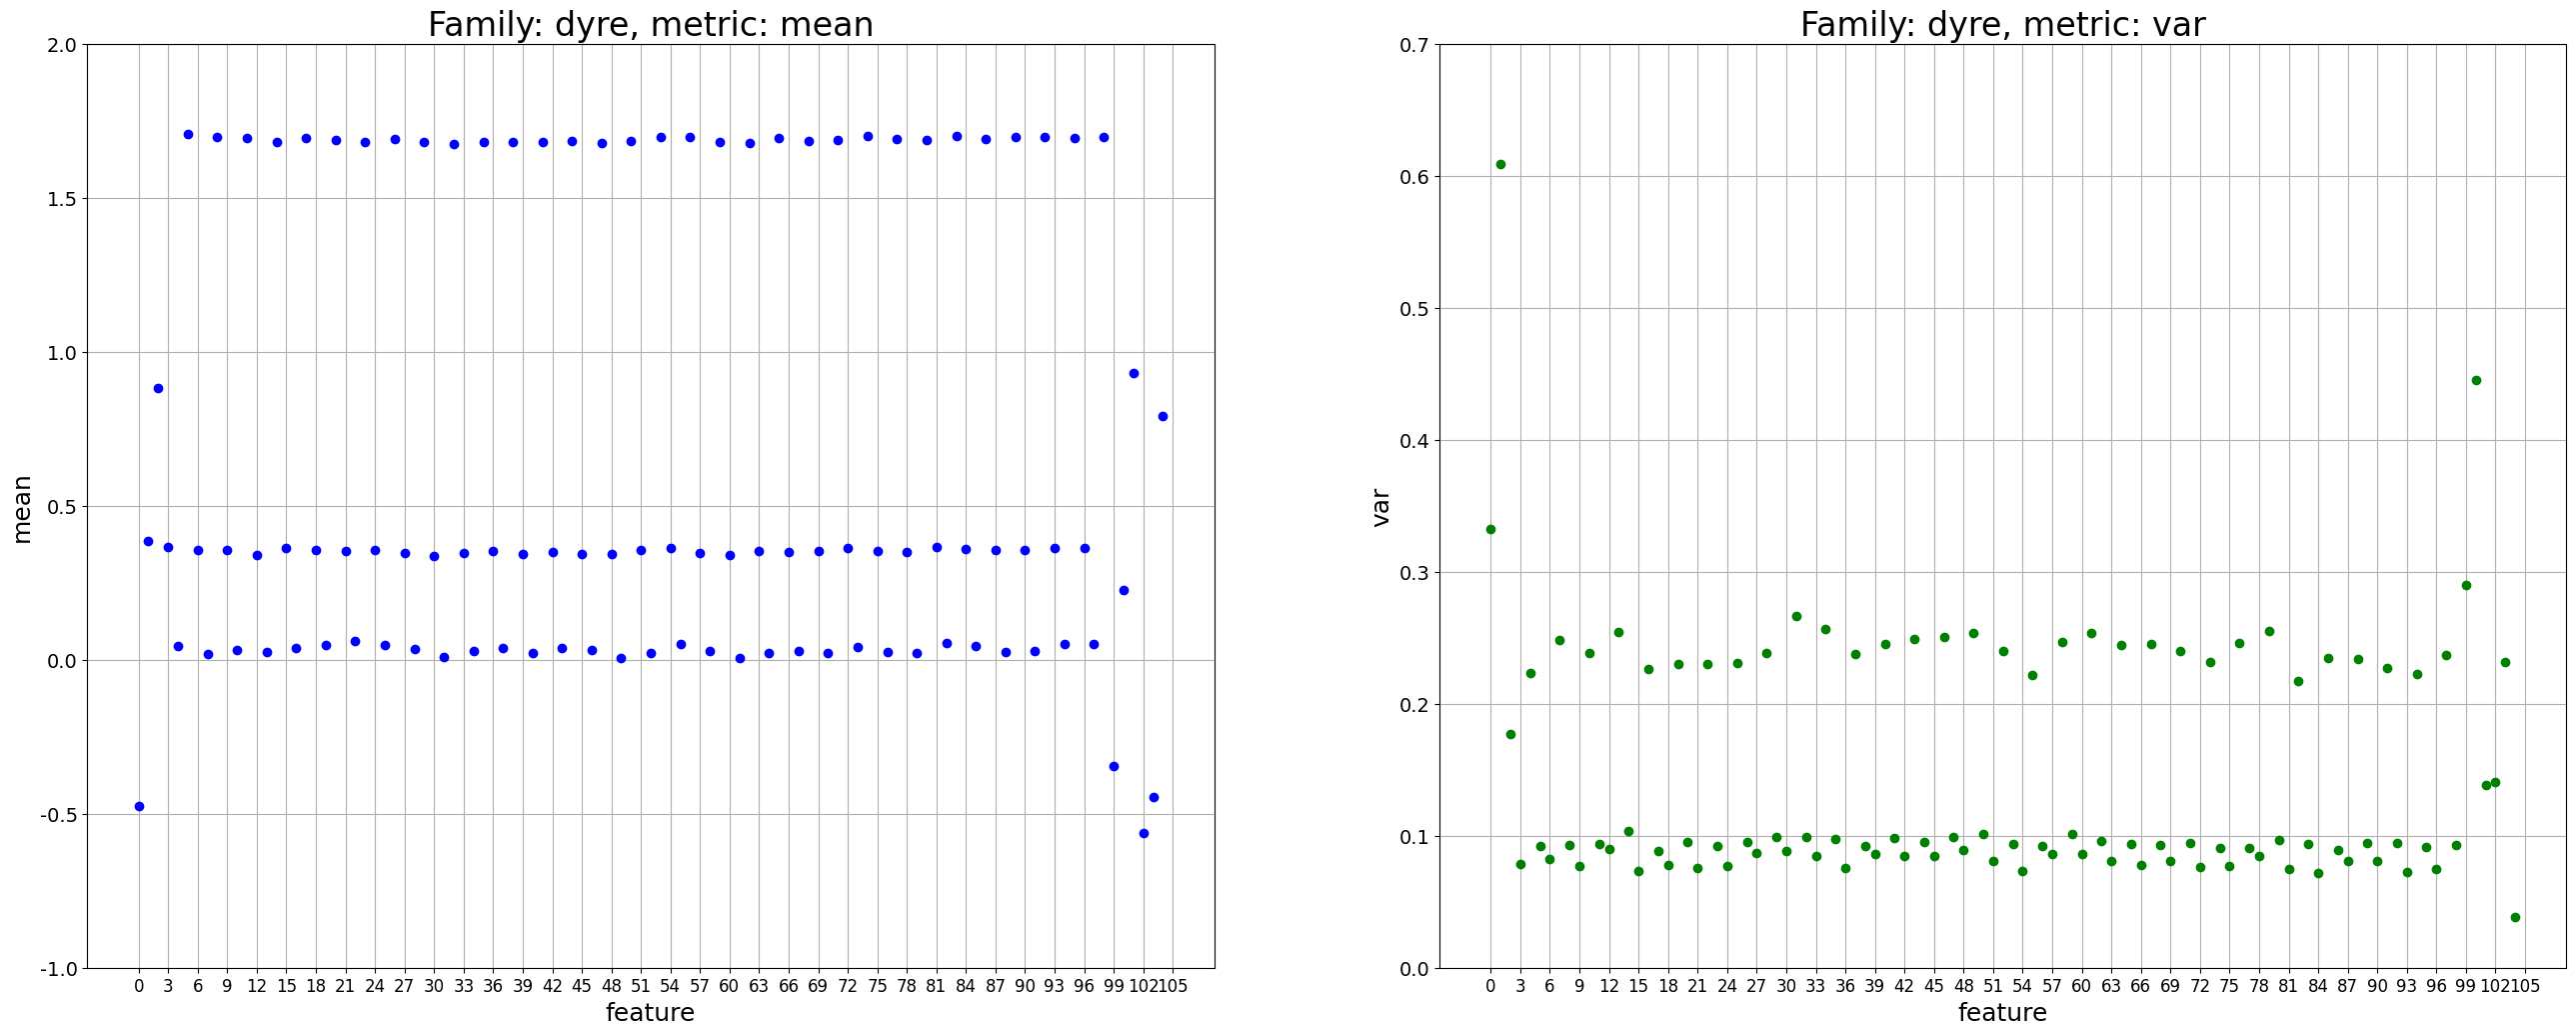

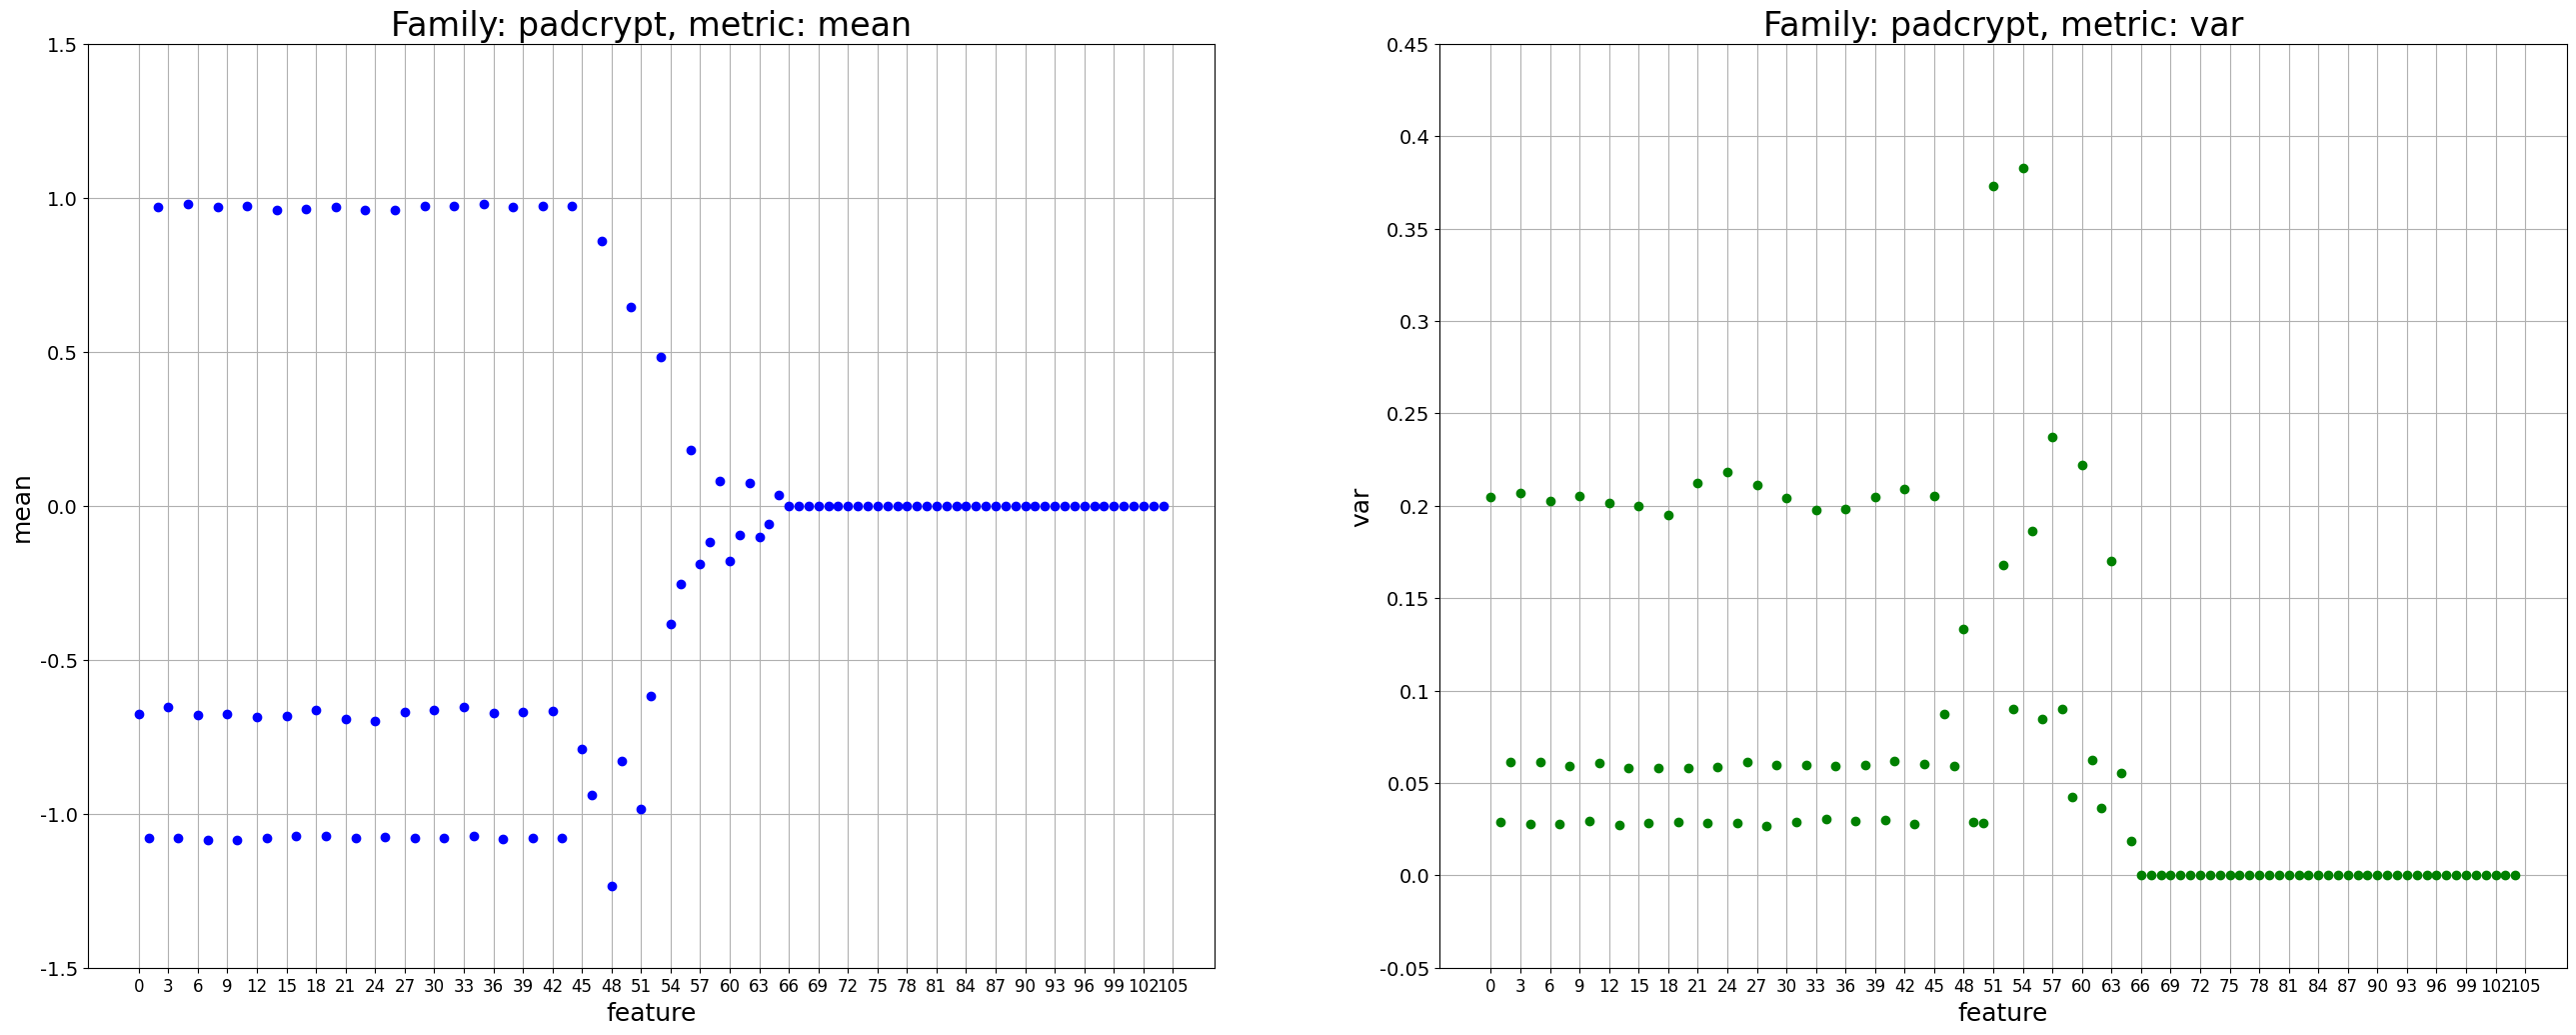

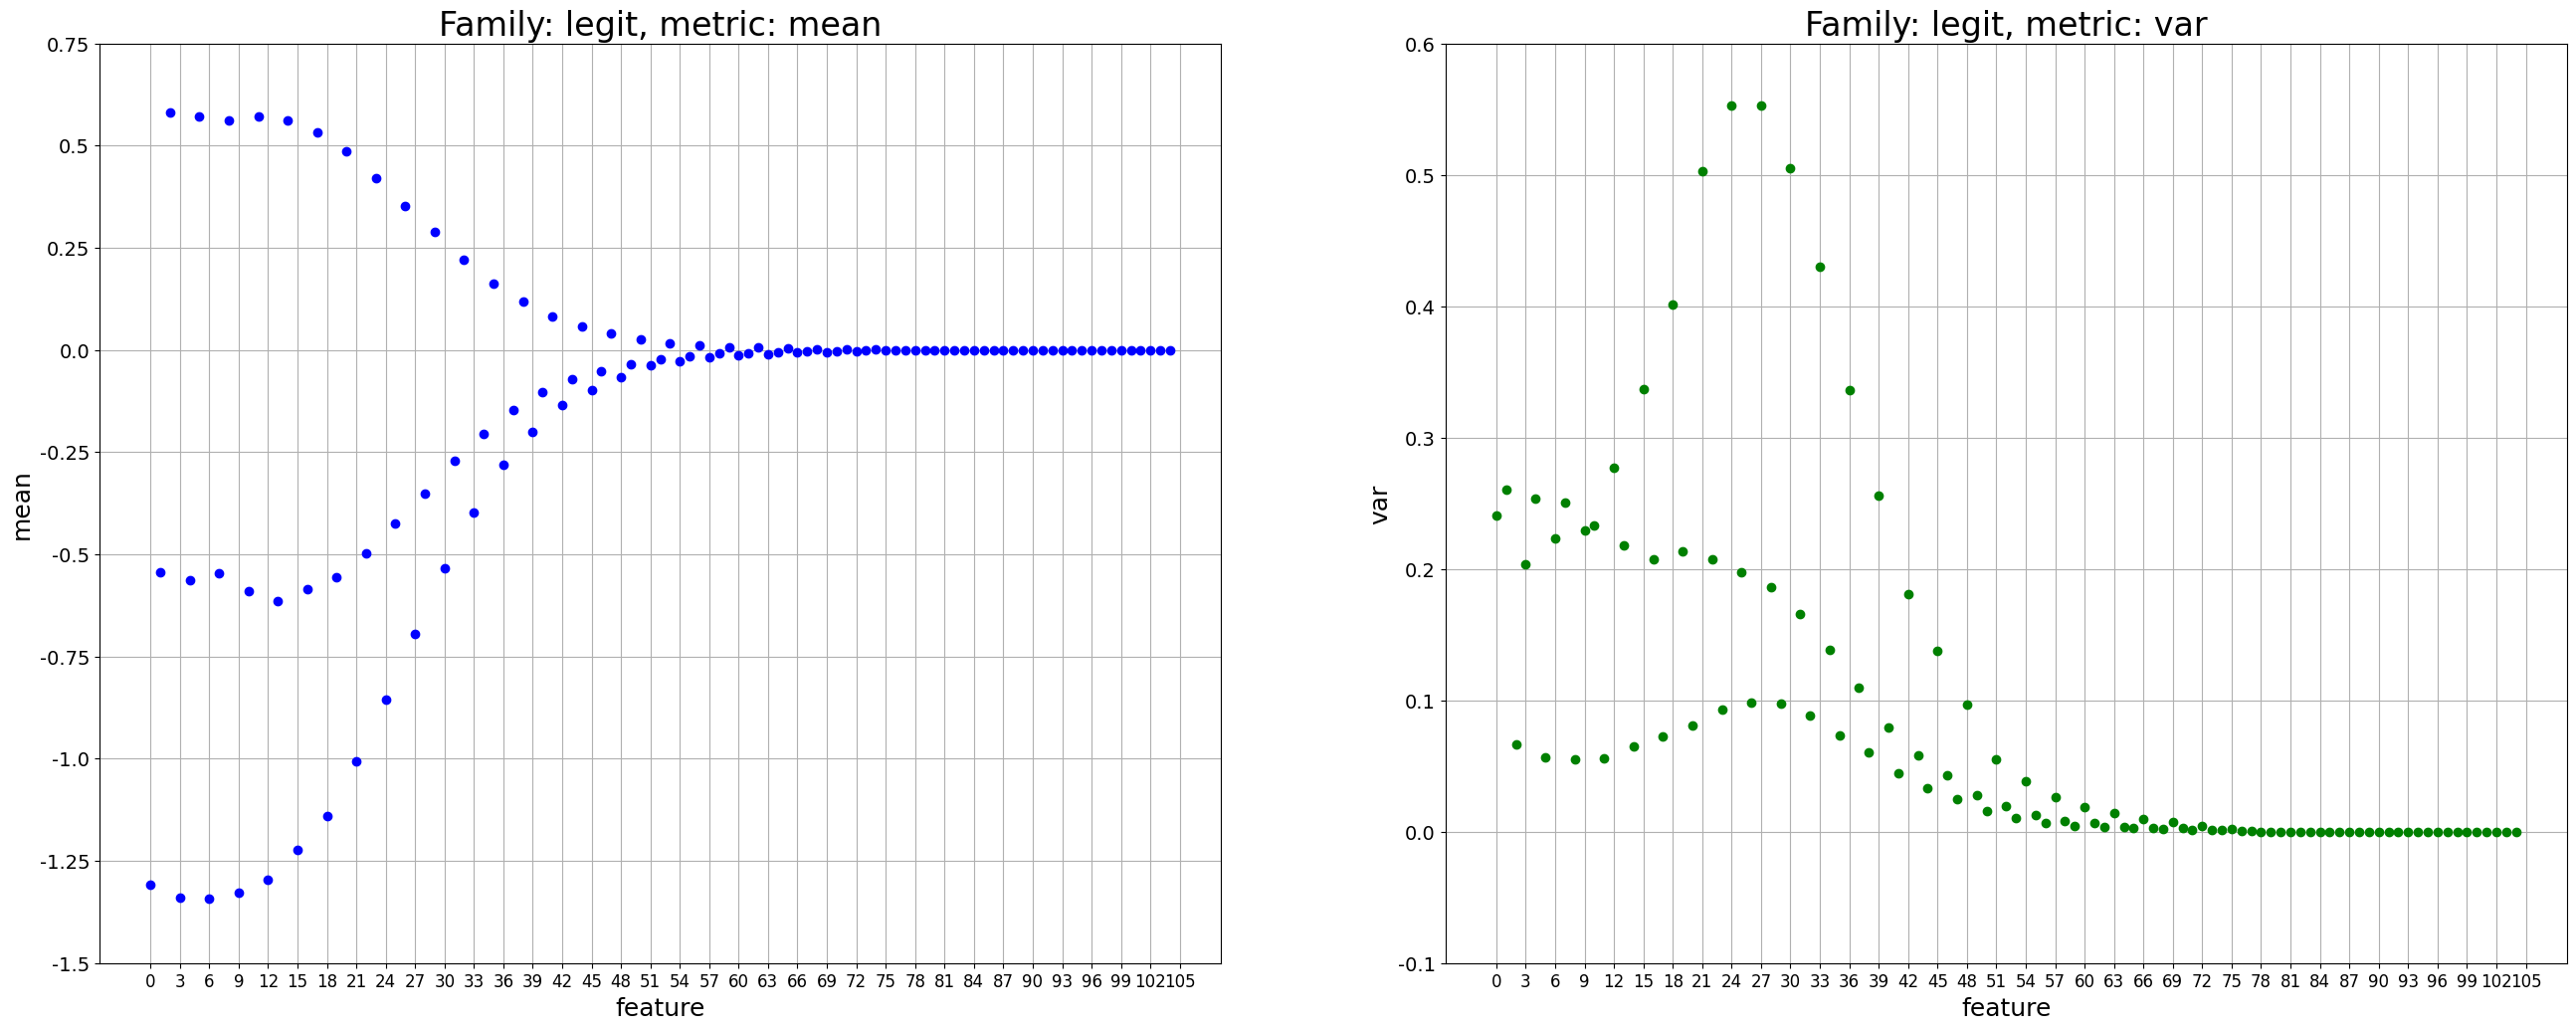

In [32]:
def run_stats():
    # COLLEZIONAMENTO DATI DAL DATASET
    dim=3 #dimensione di fasttext
    dataset = pd.read_csv(f'{base_path}/example_dataset.csv')
    domain_names = dataset["bigrams"]
    families=set(dataset["label_multiclass"])
    max_len = np.max([len(x.split()) for x in domain_names])
    results = {family: {metric: [] for metric in ["mean", "var", "std"]} for family in families}
    dict_skipgram = fasttextPreTrained(f"{base_path}/fasttext.vec")
    #dataset_to_study = dataset[dataset["family"] == family]
    #domain_names_to_study = dataset_to_study[embedding_type]
    for family in families:
        dataset_to_study = dataset[dataset["label_multiclass"] == family]
        domain_names_to_study = dataset_to_study["bigrams"]
        embedded_domain_names = []
        for name in domain_names_to_study:
            sequences = np.array(
                [dict_skipgram.get(token) if dict_skipgram.get(token) is not None else np.zeros(dim)
                for token in name.split()], dtype=np.single)
            pad = np.zeros(dim * (max_len - len(name.split())), dtype=np.single)
            embedded_domain_name = np.concatenate((sequences, pad), axis=None, dtype=np.single)
            embedded_domain_names.append(embedded_domain_name)
        embedded_domain_names = np.array(embedded_domain_names)
        np.set_printoptions(threshold=sys.maxsize)
        results[family]["mean"] = np.mean(embedded_domain_names, axis=0).tolist()
        results[family]["var"] = np.var(embedded_domain_names, axis=0).tolist()
        results[family]["std"] = np.std(embedded_domain_names, axis=0).tolist()
    for family in families:
        figure, axes = plt.subplots(1,2)
        figure.set_size_inches(32, 12)
        i = 0
        for metric, style in zip(["mean", "var"],["bo","go"]):
            axes[i%2].plot(results[family][metric], style)
            axes[i%2].set_title(f"Family: {family}, metric: {metric}", fontsize=24)
            axes[i%2].set_xlabel("feature", fontsize=18)
            axes[i%2].set_ylabel(f"{metric}", fontsize=18)
            axes[i%2].set_xticks(ticks=list(range(0,106, 3)), labels=list(range(0,106, 3)), rotation=0, fontsize=12)
            axes[i%2].set_yticks(ticks=[round(t, 2) for t in axes[i%2].get_yticks()], 
                                 labels=[round(t, 2) for t in axes[i%2].get_yticks()], fontsize=14)
            axes[i%2].grid()
            #figure.savefig(f"{metric}_{family}")
            i+=1
        plt.show()

run_stats()